# K-Nearest Neighbors (KNN)

**Machine Learning** is the process where computers learn to make decisions from data without being explicitly programmed.

**Supervised Learning** is a type of ML where the values to be predicted are already known. A model is built with the aim of accurately predicting values of previously unseen data.

**K-Nearest Neighbors** falls under Classification in Supervised ML. It predicts the label of any data point by looking at the K.Eg, if k=3. It looks at the closest 3 points and gets votingon what label the unlabelled observation should have based on the majority.

ML Requirements

1. *No missing values*
2. *Data must be numeric*
3. *In a dataframe / Series / Numpy array*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
churn_df = pd.read_csv('Data/telecom_churn_clean.csv')
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [3]:
churn_df = churn_df.drop(columns = 'Unnamed: 0')
churn_df.shape

(3333, 19)

In [4]:
# Check for missing values in each column
missing_values = churn_df.isnull().any()
print("Columns with missing values:")
print(missing_values[missing_values].index.tolist())

Columns with missing values:
[]


In [5]:
X = churn_df[['total_day_charge', 'total_eve_charge']].values
y = churn_df['churn'].values

In [6]:
# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)
# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [7]:
# new unseen data 
X_new = np.array([[56.8, 17.5],
                  [24.4,24.1],
                  [50.1,10.9]]
                  )

In [8]:
predictions = knn.predict(X_new)
print('predictions : {}'.format (predictions))

predictions : [1 0 0]


## Train/test split + computing accuracy

In [9]:
# features / predictor variables / independent variables
X = churn_df.drop("churn", axis=1).values
# target variable / response variable / dependant variable
y = churn_df["churn"].values

# split the data into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, stratify=y)

# initiate the classifier
knn = KNeighborsClassifier(n_neighbors = 5)

# fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
# test the accuracy
print(f'model accuracy is: {knn.score(X_test, y_test):.2%}')

model accuracy is: 87.41%


How do we know the right K to use so that we do not have underfitting or undefitting issues?
Let us try out different (k's)

In [11]:
# Create neighbors as a numpy array of values from 1 up to and including 12.
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

# Build models with various neighbors
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

In [12]:
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9036009002250562, 3: 0.9114778694673669, 4: 0.8945986496624156, 5: 0.8953488372093024, 6: 0.8893473368342085, 7: 0.8885971492873218, 8: 0.8863465866466617, 9: 0.8870967741935484, 10: 0.8840960240060015, 11: 0.8874718679669917, 12: 0.8837209302325582} 
 {1: 0.7946026986506747, 2: 0.8605697151424287, 3: 0.8500749625187406, 4: 0.8695652173913043, 5: 0.8740629685157422, 6: 0.8650674662668666, 7: 0.8710644677661169, 8: 0.863568215892054, 9: 0.8725637181409296, 10: 0.8665667166416792, 11: 0.8710644677661169, 12: 0.8710644677661169}


Notice how training accuracy decreases as the number of neighbors initially gets larger, and vice versa for the testing accuracy? These scores would be much easier to interpret in a line plot, so let's produce a model complexity curve of these results.

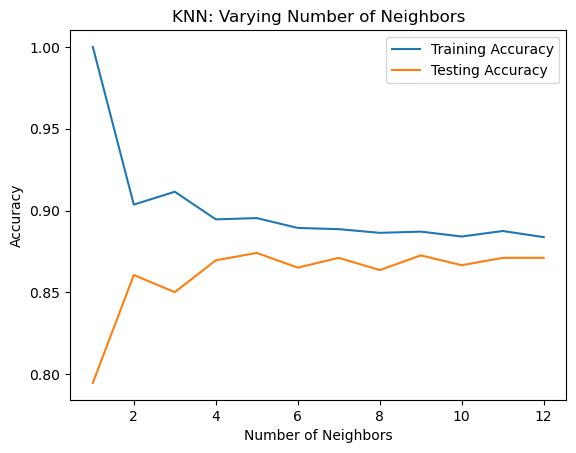

In [13]:
plt.title("KNN: Varying Number of Neighbors")

plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

plt.show()

Training accuracy decreases and test accuracy increases as the number of neighbors gets larger. For the test set, accuracy peaks with 9 neighbors, suggesting it is the optimal value for our model.